In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statistics
plt.rc('figure', facecolor='w', figsize=[4,3])

In [41]:
divs = list([("%.2f" % (x/100.0)) for x in range(90, 101, 1)])
print(divs)

unmapped="""
  1368585 mapquik-div0.90.unmapped.out
  1368641 mapquik-div0.91.unmapped.out
  1368707 mapquik-div0.92.unmapped.out
  1368589 mapquik-div0.93.unmapped.out
  1368386 mapquik-div0.94.unmapped.out
  1364504 mapquik-div0.95.unmapped.out
  1302187 mapquik-div0.96.unmapped.out
   819739 mapquik-div0.97.unmapped.out
   129435 mapquik-div0.98.unmapped.out
    57393 mapquik-div0.99.unmapped.out
    42397 mapquik-div1.00.unmapped.out
"""

mapped = """    
    16655 mapquik-div0.90.paf
    33112 mapquik-div0.91.paf
    66807 mapquik-div0.92.paf
   138705 mapquik-div0.93.paf
   286416 mapquik-div0.94.paf
   566038 mapquik-div0.95.paf
   970137 mapquik-div0.96.paf
  1275301 mapquik-div0.97.paf
  1345097 mapquik-div0.98.paf
  1357864 mapquik-div0.99.paf
  1359542 mapquik-div1.00.paf
"""

evals = """
mapquik-div0.90.paf
Q       0       16655   1798    0.107955569     16655
mapquik-div0.91.paf
Q       60      1       0       0.000000000     1
Q       0       33111   2790    0.084259483     33112
mapquik-div0.92.paf
Q       60      2       0       0.000000000     2
Q       0       66805   4150    0.062119239     66807
mapquik-div0.93.paf
Q       60      18      0       0.000000000     18
Q       0       138687  6608    0.047640676     138705
mapquik-div0.94.paf
Q       60      231     0       0.000000000     231
Q       0       286185  9997    0.034903776     286416
mapquik-div0.95.paf
Q       60      4183    0       0.000000000     4183
Q       0       561855  15421   0.027243754     566038
mapquik-div0.96.paf
Q       60      66551   0       0.000000000     66551
Q       0       903586  21859   0.022531869     970137
mapquik-div0.97.paf
Q       60      549040  0       0.000000000     549040
Q       0       726261  27195   0.021324378     1275301
mapquik-div0.98.paf
Q       60      1239255 2       0.000001614     1239255
Q       0       105842  27608   0.020526401     1345097
mapquik-div0.99.paf
Q       60      1311293 4       0.000003050     1311293
Q       0       46571   18368   0.013530074     1357864
mapquik-div1.00.paf
Q       60      1326301 6       0.000004524     1326301
Q       0       33241   11243   0.008274110     1359542
"""

d_unmapped = {}
for line in unmapped.split('\n'):
    if len(line.split()) != 2: continue
    nb, name = line.split()
    div = name[11:15]
    nb = int(nb)
    print(nb,div)
    d_unmapped[div]=nb
    
d_mapped = {}
for line in mapped.split('\n'):
    if len(line.split()) != 2: continue
    nb, name = line.split()
    div = name[11:15]
    nb = int(nb)
    print(nb,div)
    d_mapped[div]=nb
    
d_evals = {}
div =None
for line in evals.split('\n'):
    ls = line.split()
    if len(ls) == 0: continue
    if len(ls) == 1:
        div = ls[0][11:15]
        d_evals[div]=(0,0)
    else:
        a,b,c,d,e,f = line.split()
        qual = int(b)
        n_mapped_60 = int(c)
        n_err_60 = int(d)
        if qual == 60:
            d_evals[div]=(n_mapped_60,n_err_60)

data_divs=[]
for div in divs:
    data_divs += [(div,d_mapped[div],d_evals[div][0],d_evals[div][1])]


['0.90', '0.91', '0.92', '0.93', '0.94', '0.95', '0.96', '0.97', '0.98', '0.99', '1.00']
1368585 0.90
1368641 0.91
1368707 0.92
1368589 0.93
1368386 0.94
1364504 0.95
1302187 0.96
819739 0.97
129435 0.98
57393 0.99
42397 1.00
16655 0.90
33112 0.91
66807 0.92
138705 0.93
286416 0.94
566038 0.95
970137 0.96
1275301 0.97
1345097 0.98
1357864 0.99
1359542 1.00


     divergence  Mapped total  Mapped Q60  Wrong Q60
0.90       0.90         16655           0          0
0.91       0.91         33112           1          0
0.92       0.92         66807           2          0
0.93       0.93        138705          18          0
0.94       0.94        286416         231          0
0.95       0.95        566038        4183          0
0.96       0.96        970137       66551          0
0.97       0.97       1275301      549040          0
0.98       0.98       1345097     1239255          2
0.99       0.99       1357864     1311293          4
1.00       1.00       1359542     1326301          6


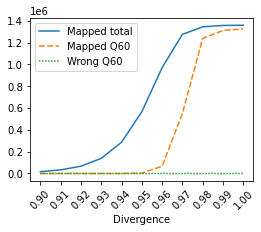

In [56]:
df = pd.DataFrame([x for x in data_divs],columns=("divergence","Mapped total","Mapped Q60","Wrong Q60"),index=divs)
print(df)
sns_plot = sns.lineplot(data=df)
#ylabels = ['{:}%'.format(int(x*100))  for x in sns_plot.get_yticks()]
#sns_plot.set_yticklabels(ylabels)
#plt.xticks(sns_plot.get_xticks(), list(map(lambda x:"%d"%x,sns_plot.get_xticks())))
sns_plot.set(xlabel='Divergence', ylabel='')
plt.xticks(rotation=45)
#plt.title('Number of occurrences in CHM13 k-mers per read in the HG002 DeepConsensus dataset')
fig = sns_plot.get_figure()
plt.show()

fig.savefig("divergence_analysis.pdf", bbox_inches='tight', dpi =300)


In [14]:
# extended version


evals = """
mapquik-k4-div0.90.paf
Q       60      11000   0       0.000000000     11000
Q       0       703219  27937   0.039115453     714219
mapquik-k4-div0.91.paf
Q       60      40814   0       0.000000000     40814
Q       0       866818  32705   0.036033326     907632
mapquik-k4-div0.92.paf
Q       60      137784  0       0.000000000     137784
Q       0       955572  37299   0.034114232     1093356
mapquik-k4-div0.93.paf
Q       60      382312  0       0.000000000     382312
Q       0       849182  41483   0.033685101     1231494
mapquik-k4-div0.94.paf
Q       60      790356  0       0.000000000     790356
Q       0       515925  45012   0.034458130     1306281
mapquik-k4-div0.95.paf
Q       60      1140636 0       0.000000000     1140636
Q       0       194640  47365   0.035472067     1335276
mapquik-k4-div0.96.paf
Q       60      1256011 0       0.000000000     1256011
Q       0       91761   47355   0.035135765     1347772
mapquik-k4-div0.97.paf
Q       60      1278482 0       0.000000000     1278482
Q       0       76712   42645   0.031467819     1355194
mapquik-k4-div0.98.paf
Q       60      1294829 2       0.000001545     1294829
Q       0       65151   34639   0.025471698     1359980
mapquik-k4-div0.99.paf
Q       60      1311063 2       0.000001525     1311063
Q       0       51056   23272   0.017086613     1362119
mapquik-k4-div1.00.paf
Q       60      1318220 1       0.000000759     1318220
Q       0       42883   15612   0.011470844     1361103
mapquik-k5-div0.90.paf
Q       60      125     0       0.000000000     125
Q       0       263211  10086   0.038300878     263336
mapquik-k5-div0.91.paf
Q       60      707     0       0.000000000     707
Q       0       400139  13752   0.034307440     400846
mapquik-k5-div0.92.paf
Q       60      4439    0       0.000000000     4439
Q       0       591572  18694   0.031365193     596011
mapquik-k5-div0.93.paf
Q       60      26552   0       0.000000000     26552
Q       0       814768  24505   0.029126848     841320
mapquik-k5-div0.94.paf
Q       60      132656  0       0.000000000     132656
Q       0       957516  30441   0.027923117     1090172
mapquik-k5-div0.95.paf
Q       60      481619  0       0.000000000     481619
Q       0       780331  36205   0.028689726     1261950
mapquik-k5-div0.96.paf
Q       60      1022927 0       0.000000000     1022927
Q       0       306202  40243   0.030277723     1329129
mapquik-k5-div0.97.paf
Q       60      1258768 0       0.000000000     1258768
Q       0       89233   39275   0.029135735     1348001
mapquik-k5-div0.98.paf
Q       60      1290197 1       0.000000775     1290197
Q       0       66816   32983   0.024306326     1357013
mapquik-k5-div0.99.paf
Q       60      1311990 2       0.000001524     1311990
Q       0       49106   21289   0.015642541     1361096
mapquik-k5-div1.00.paf
Q       60      1321811 1       0.000000757     1321811
Q       0       39002   13850   0.010178474     1360813
mapquik-k6-div0.90.paf
Q       0       80873   2995    0.037033373     80873
mapquik-k6-div0.91.paf
Q       60      13      0       0.000000000     13
Q       0       139530  4814    0.034498327     139543
mapquik-k6-div0.92.paf
Q       60      94      0       0.000000000     94
Q       0       242726  7375    0.030372292     242820
mapquik-k6-div0.93.paf
Q       60      906     0       0.000000000     906
Q       0       414889  11366   0.027335586     415795
mapquik-k6-div0.94.paf
Q       60      9182    0       0.000000000     9182
Q       0       670941  16625   0.024444108     680123
mapquik-k6-div0.95.paf
Q       60      75811   0       0.000000000     75811
Q       0       924305  23444   0.023441281     1000116
mapquik-k6-div0.96.paf
Q       60      426670  0       0.000000000     426670
Q       0       821034  30198   0.024202856     1247704
mapquik-k6-div0.97.paf
Q       60      1084500 0       0.000000000     1084500
Q       0       249163  33527   0.025139034     1333663
mapquik-k6-div0.98.paf
Q       60      1282548 0       0.000000000     1282548
Q       0       70037   30720   0.022712066     1352585
mapquik-k6-div0.99.paf
Q       60      1312057 2       0.000001524     1312057
Q       0       47876   19908   0.014640427     1359933
mapquik-k6-div1.00.paf
Q       60      1324641 0       0.000000000     1324641
Q       0       35592   12389   0.009107998     1360233
mapquik-k7-div0.90.paf
Q       0       23535   869     0.036923731     23535
mapquik-k7-div0.91.paf
Q       60      2       0       0.000000000     2
Q       0       44595   1600    0.035876853     44597
mapquik-k7-div0.92.paf
Q       60      3       0       0.000000000     3
Q       0       87643   2793    0.031866828     87646
mapquik-k7-div0.93.paf
Q       60      36      0       0.000000000     36
Q       0       174335  4834    0.027722500     174371
mapquik-k7-div0.94.paf
Q       60      512     0       0.000000000     512
Q       0       341582  7934    0.023192456     342094
mapquik-k7-div0.95.paf
Q       60      7372    0       0.000000000     7372
Q       0       627669  13484   0.021233275     635041
mapquik-k7-div0.96.paf
Q       60      94730   0       0.000000000     94730
Q       0       927882  20598   0.020142537     1022612
mapquik-k7-div0.97.paf
Q       60      628563  0       0.000000000     628563
Q       0       659077  26806   0.020817930     1287640
mapquik-k7-div0.98.paf
Q       60      1248939 1       0.000000801     1248939
Q       0       97041   27613   0.020515907     1345980
mapquik-k7-div0.99.paf
Q       60      1311170 3       0.000002288     1311170
Q       0       47199   18526   0.013640623     1358369
mapquik-k7-div1.00.paf
Q       60      1326527 7       0.000005277     1326527
Q       0       33152   11278   0.008299753     1359679
mapquik-k8-div0.90.paf
Q       0       6751    255     0.037772182     6751
mapquik-k8-div0.91.paf
Q       0       13947   502     0.035993404     13947
mapquik-k8-div0.92.paf
Q       60      3       0       0.000000000     3
Q       0       30139   955     0.031683365     30142
mapquik-k8-div0.93.paf
Q       60      7       0       0.000000000     7
Q       0       68280   1886    0.027618727     68287
mapquik-k8-div0.94.paf
Q       60      52      0       0.000000000     52
Q       0       154350  3477    0.022519138     154402
mapquik-k8-div0.95.paf
Q       60      789     0       0.000000000     789
Q       0       345044  6942    0.020073272     345833
mapquik-k8-div0.96.paf
Q       60      16252   0       0.000000000     16252
Q       0       697351  12632   0.017701719     713603
mapquik-k8-div0.97.paf
Q       60      244389  0       0.000000000     244389
Q       0       912476  19950   0.017244882     1156865
mapquik-k8-div0.98.paf
Q       60      1100730 2       0.000001817     1100730
Q       0       234013  23830   0.017855123     1334743
mapquik-k8-div0.99.paf
Q       60      1309608 7       0.000005345     1309608
Q       0       46922   17395   0.012828319     1356530
mapquik-k8-div1.00.paf
Q       60      1327783 8       0.000006025     1327783
Q       0       31283   10404   0.007661144     1359066"""
    
d_evals = {}
div = None
for line in evals.split('\n'):
    ls = line.split()
    if len(ls) == 0: continue
    if len(ls) == 1:
        k = ls[0][9:10]
        div = ls[0][14:18]
        d_evals[(k,div)]=(0,0)
    else:
        a,b,c,d,e,f = line.split()
        qual = int(b)
        n_mapped_60 = int(c)
        n_err_60 = int(d)
        if qual == 60:
            d_evals[(k,div)]=(n_mapped_60,n_err_60)

data_k_divs=[]
for (k,div) in d_evals:
    data_k_divs += [(div,k,d_evals[(k,div)][0],d_evals[(k,div)][1])]


   divergence  k  Mapped Q60  Wrong Q60
0        0.90  4       11000          0
1        0.91  4       40814          0
2        0.92  4      137784          0
3        0.93  4      382312          0
4        0.94  4      790356          0
5        0.95  4     1140636          0
6        0.96  4     1256011          0
7        0.97  4     1278482          0
8        0.98  4     1294829          2
9        0.99  4     1311063          2
10       1.00  4     1318220          1
11       0.90  5         125          0
12       0.91  5         707          0
13       0.92  5        4439          0
14       0.93  5       26552          0
15       0.94  5      132656          0
16       0.95  5      481619          0
17       0.96  5     1022927          0
18       0.97  5     1258768          0
19       0.98  5     1290197          1
20       0.99  5     1311990          2
21       1.00  5     1321811          1
22       0.90  6           0          0
23       0.91  6          13          0


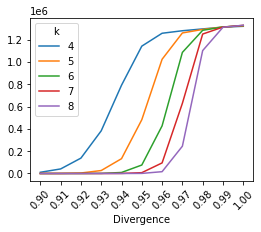

In [27]:
divs = list([("%.2f" % (x/100.0)) for x in range(90, 101, 1)])
df = pd.DataFrame([x for x in data_k_divs],columns=("divergence","k","Mapped Q60","Wrong Q60"))
print(df)
sns_plot = sns.lineplot(data=df,x="divergence",y="Mapped Q60",hue="k")
#sns_plot = sns.lineplot(data=df,x="divergence",y="Wrong Q60")
#ylabels = ['{:}%'.format(int(x*100))  for x in sns_plot.get_yticks()]
#sns_plot.set_yticklabels(ylabels)
#plt.xticks(sns_plot.get_xticks(), list(map(lambda x:"%d"%x,sns_plot.get_xticks())))
sns_plot.set(xlabel='Divergence', ylabel='')
plt.xticks(rotation=45)
#plt.title('Number of occurrences in CHM13 k-mers per read in the HG002 DeepConsensus dataset')
fig = sns_plot.get_figure()
plt.show()

fig.savefig("divergence_analysis.pdf", bbox_inches='tight', dpi =300)
